In [29]:
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import pathlib
from keras.utils import np_utils


In [30]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

def convert_to_discrete(texto):
    i, = np.where(categories == texto) 
    return i[0]

In [31]:
def convert_long_label_in_model_label(list_of_label_test):
    result = []
    for element in list_of_label_test:
        line = [0.0, 0.0, 0.0]
        line[element] = 1.0
        result.append(line)
    return np.array(result)

In [64]:
def plot_history(history) :
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plot_graphs(history, 'accuracy')
    plt.ylim(None, 1)
    plt.subplot(1, 2, 2)
    plot_graphs(history, 'loss')
    plt.ylim(0, None)
    
def compara(predito, real):
    predicao = conserta_predicao(predito)
    for j in range(0, len(predicao)):
        if predicao[j] != real[j]:
            return False
    return True

def conserta_predicao(predito):
    maior = 0
    anterior = -1000
    for i in range(0, len(predito)):
        if predito[i] > anterior:
            maior = i
            anterior = predito[i]

    predicao = [0 for i in range(0, len(predito))]
    predicao[maior] = 1
    return predicao


In [33]:
LABELED_DATA = "../stemmed_words/labeled_and_stemmed_articles_com_etiquetas.csv"
# PREPARED_DATA_FOR_TF = "labeled_articles_prepared.csv"


df_news = pd.read_csv(LABELED_DATA, sep='\t')


In [34]:
df_news = df_news[
        (df_news.etiqueta == 'Relacionado à Petrobrás')
        | (df_news.etiqueta == 'Relacionado ao mercado de ações')
        | (df_news.etiqueta == 'Relacionado à estatais, governo e políticas públicas')
        | (df_news.etiqueta == 'Relacionado ao setor de petróleo ou energia')
    ]

In [35]:
df_news.head()

,date,title,text,indice,comparativo,link,coef,coef_anterior,stemm,etiqueta
5,2016-04-01,Bolsa sobe 18% e dólar recua mais de 6% na sem...,euforia mercado financeiro brasileiro continuo...,-1,-0.056061,http://www1.folha.uol.com.br/mercado/2016/03/1...,0.0,0.056061,acion aprov nest quintaf reserv milho event pa...,Relacionado ao mercado de ações
7,2016-04-01,Não havia como Lula não saber de desvios na Pe...,pedido busca apreensao contra expresidente lui...,-1,-0.056061,http://www1.folha.uol.com.br/poder/2016/03/174...,0.0,0.056061,acion hidreletr bel mont send constru aprov ab...,Relacionado à Petrobrás
14,2016-04-01,Esqueleto de ações trabalhistas de R$ 30 bilhõ...,meio maior crise financeira historia petrobras...,-1,-0.056061,http://www1.folha.uol.com.br/mercado/2016/03/1...,0.0,0.056061,aco ordin jb mai empr aliment mund fech qued n...,Relacionado à Petrobrás
15,2016-04-01,Há indício de que Lula recebeu verba desviada ...,manifestacao contundente desde inicio operacao...,-1,-0.056061,http://www1.folha.uol.com.br/poder/2016/03/174...,0.0,0.056061,acord delaca premi expresid transpetr sergi ma...,"Relacionado à estatais, governo e políticas pú..."
21,2016-04-01,"Dólar cai a R$ 3,72 e Bolsa sobe com ação da P...",segundo dia seguido mercado financeiro brasile...,-1,-0.056061,http://www1.folha.uol.com.br/mercado/2016/03/1...,0.0,0.056061,acord renegociaca div bilho odebrecht agroindu...,Relacionado ao mercado de ações


In [36]:
df_news['arr'] = df_news.text.str.split(' ').tolist()


In [37]:
arr_result = []
for i, item in df_news.iterrows():
    arr_result.append(len(item.arr))

df_news['arr_size'] = arr_result

In [38]:
df_news.describe()

,indice,comparativo,coef,coef_anterior,arr_size
count,385.000000,385.000000,385.000000,385.000000,385.000000
mean,0.132468,0.031113,0.063948,0.032835,324.605195
std,0.981925,0.299167,0.290404,0.135313,147.155955
min,-1.000000,-0.650848,-0.690000,-0.241333,60.000000
25%,-1.000000,-0.147091,0.000000,-0.065758,220.000000
50%,1.000000,0.065758,0.000000,0.029182,310.000000
75%,1.000000,0.212485,0.250000,0.147091,416.000000
max,1.000000,0.726455,0.760000,0.268000,979.000000


In [39]:
VOCAB_SIZE = 400

In [40]:
df_news.shape, df_news[df_news.link.str.contains('mercado')].shape, df_news[df_news.link.str.contains('poder')].shape

((385, 12), (338, 12), (40, 12))

In [41]:
df_news.date.unique()

array(['2016-04-01', '2016-04-04', '2016-04-05', '2016-04-07',
       '2016-04-08', '2016-04-11', '2016-04-12', '2016-04-13',
       '2016-04-14', '2016-04-15', '2016-04-18', '2016-04-19',
       '2016-04-20', '2016-04-22', '2016-04-25', '2016-04-26',
       '2016-04-27', '2016-04-28', '2016-04-29', '2016-05-02',
       '2016-05-03', '2016-05-04', '2016-05-05', '2016-05-06',
       '2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
       '2016-05-13', '2016-05-16', '2016-05-17', '2016-05-18',
       '2016-05-19', '2016-05-20', '2016-05-23', '2016-05-24',
       '2016-05-25', '2016-05-27', '2016-05-30', '2016-05-31',
       '2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
       '2016-06-07', '2016-06-09', '2016-06-10', '2016-06-13',
       '2016-06-14', '2016-06-15', '2016-06-16', '2016-06-17',
       '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
       '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
       '2016-06-30'], dtype=object)

In [42]:
category = []
for indice in df_news.indice.to_list():
    value = 'neutro'
    if(indice > 0):
        value = 'alta'
    if(indice < 0):
        value = 'baixa'

    category.append(value)

df_news['category'] = category

In [43]:
df_news.head()

,date,title,text,indice,comparativo,link,coef,coef_anterior,stemm,etiqueta,arr,arr_size,category
5,2016-04-01,Bolsa sobe 18% e dólar recua mais de 6% na sem...,euforia mercado financeiro brasileiro continuo...,-1,-0.056061,http://www1.folha.uol.com.br/mercado/2016/03/1...,0.0,0.056061,acion aprov nest quintaf reserv milho event pa...,Relacionado ao mercado de ações,"[euforia, mercado, financeiro, brasileiro, con...",383,baixa
7,2016-04-01,Não havia como Lula não saber de desvios na Pe...,pedido busca apreensao contra expresidente lui...,-1,-0.056061,http://www1.folha.uol.com.br/poder/2016/03/174...,0.0,0.056061,acion hidreletr bel mont send constru aprov ab...,Relacionado à Petrobrás,"[pedido, busca, apreensao, contra, expresident...",267,baixa
14,2016-04-01,Esqueleto de ações trabalhistas de R$ 30 bilhõ...,meio maior crise financeira historia petrobras...,-1,-0.056061,http://www1.folha.uol.com.br/mercado/2016/03/1...,0.0,0.056061,aco ordin jb mai empr aliment mund fech qued n...,Relacionado à Petrobrás,"[meio, maior, crise, financeira, historia, pet...",275,baixa
15,2016-04-01,Há indício de que Lula recebeu verba desviada ...,manifestacao contundente desde inicio operacao...,-1,-0.056061,http://www1.folha.uol.com.br/poder/2016/03/174...,0.0,0.056061,acord delaca premi expresid transpetr sergi ma...,"Relacionado à estatais, governo e políticas pú...","[manifestacao, contundente, desde, inicio, ope...",567,baixa
21,2016-04-01,"Dólar cai a R$ 3,72 e Bolsa sobe com ação da P...",segundo dia seguido mercado financeiro brasile...,-1,-0.056061,http://www1.folha.uol.com.br/mercado/2016/03/1...,0.0,0.056061,acord renegociaca div bilho odebrecht agroindu...,Relacionado ao mercado de ações,"[segundo, dia, seguido, mercado, financeiro, b...",416,baixa


In [44]:
df_news = df_news[df_news.link.str.contains('mercado')]
# df_news = pd.concat([df_news[df_news.indice == 0].sample(19), df_news[df_news.indice == 1].sample(50), df_news[df_news.indice == -1].sample(50)], ignore_index=True)
X_train, X_test, y_train, y_test = train_test_split(df_news.stemm, df_news.category)


In [45]:
categories = df_news.category.unique()

In [46]:
categories

array(['baixa', 'neutro', 'alta'], dtype=object)

#### Prepara os dados 

In [47]:
list_of_data = list([element for element in X_train])
list_of_label = list([convert_to_discrete(element) for element in y_train])

In [48]:
list_of_data_test = list([element for element in X_test])
list_of_label_test = list([convert_to_discrete(element) for element in y_test])

#### Vectorizador dos artigos

In [49]:
encoder_vectorization = tf.keras.layers.TextVectorization(max_tokens=None, ngrams=3)

In [50]:
## Converte para tensor
tf_train = tf.convert_to_tensor(X_train)
tf_test = tf.convert_to_tensor(X_test)

In [51]:
encoder_vectorization.adapt(tf_train.numpy().T)
vocab = np.array(encoder_vectorization.get_vocabulary())


In [52]:
len(vocab)

139031

#### Parametros


In [53]:
t_data = tf_train.numpy().T
t_data_test = tf_test.numpy().T

tf_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
tf_dataset_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))


In [62]:
type(tf_dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [54]:
t_data.shape, t_data_test.shape

((253,), (85,))

In [55]:
BATCH_SIZE = int(len(t_data) / 10)


data = tf_dataset.shuffle(len(t_data)).batch(BATCH_SIZE).repeat().prefetch(tf.data.AUTOTUNE)
data_test = tf_dataset_test.shuffle(len(t_data_test)).batch(BATCH_SIZE).repeat().prefetch(tf.data.AUTOTUNE)

label = np_utils.to_categorical(list_of_label, len(categories)).tolist()
label_test = np_utils.to_categorical(list_of_label_test, len(categories)).tolist()

tensor_data_train = tf.convert_to_tensor(t_data)
tensor_data_test = tf.convert_to_tensor(t_data_test)
tensor_data_train_label = tf.convert_to_tensor(label)
tensor_data_test_label = tf.convert_to_tensor(label_test)


In [58]:
model = tf.keras.Sequential([
    encoder_vectorization,
    tf.keras.layers.Embedding(len(encoder_vectorization.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(len(categories))
])

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                optimizer=tf.keras.optimizers.Adam(1e-4), 
                metrics='accuracy')

history = model.fit(tensor_data_train
    , tensor_data_train_label
    , epochs=20
    , validation_data=(tensor_data_test, tensor_data_test_label)
    , steps_per_epoch=BATCH_SIZE
    , validation_steps=len(tensor_data_test)
)

Epoch 1/20
25/25 [==============================] - 16s 324ms/step - loss: 5.4340 - accuracy: 0.3200 - val_loss: 5.7152 - val_accuracy: 0.3059
Epoch 2/20
25/25 [==============================] - 6s 231ms/step - loss: 4.1600 - accuracy: 0.4545 - val_loss: 5.1137 - val_accuracy: 0.4353
Epoch 3/20
25/25 [==============================] - 5s 202ms/step - loss: 3.3055 - accuracy: 0.5236 - val_loss: 1.3924 - val_accuracy: 0.5882
Epoch 4/20
25/25 [==============================] - 5s 223ms/step - loss: 0.9662 - accuracy: 0.6327 - val_loss: 0.6392 - val_accuracy: 0.5765
Epoch 5/20
25/25 [==============================] - 7s 273ms/step - loss: 0.8454 - accuracy: 0.6800 - val_loss: 0.5071 - val_accuracy: 0.5765
Epoch 6/20
25/25 [==============================] - 7s 272ms/step - loss: 0.8794 - accuracy: 0.7091 - val_loss: 0.8068 - val_accuracy: 0.5765
Epoch 7/20
25/25 [==============================] - 7s 292ms/step - loss: 1.1051 - accuracy: 0.7527 - val_loss: 0.5936 - val_accuracy: 0.6000
Epoch

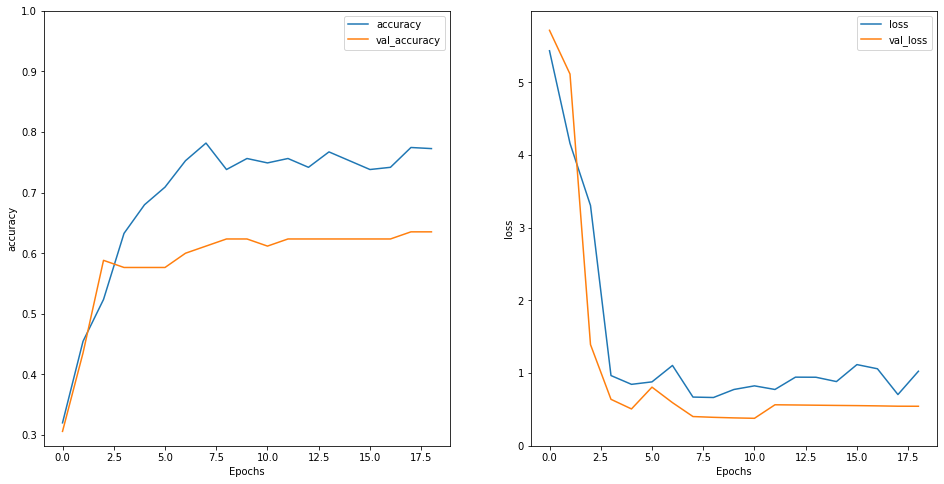

In [59]:
plot_history(history)

In [67]:
predicao = model.predict(tensor_data_test, use_multiprocessing=True)
acertos = 0
total = len(predicao)

predicao[predicao < 0] = 0
predicao[predicao > 1] = 1
for i in range(0, total):
    if(compara(np.round(predicao[i]), label_test[i])):
        acertos = 1 + acertos
        
acertos, total, acertos/total

3/3 [==============================] - 1s 82ms/step


(42, 85, 0.49411764705882355)